In [67]:
import pandas as pd
import csv
import os

os.chdir('/Users/Morgan/Documents/Graduate School/Patient Data')

clinical_data = {}
mutation_data = {}

for i in os.listdir('/Users/Morgan/Documents/Graduate School/Patient Data'):
    if "clinical" in i:
        patient_id = i[0:2]
        df = pd.read_csv(i,sep="\t")
        clinical_data[patient_id]=df
    if "frequent-mutations" in i:
        patient_id = i[0:2]
        df = pd.read_csv(i,sep="\t")
        mutation_data[patient_id]=df

full_list = ['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9','chr10','chr11','chr12','chr13','chr14'
             ,'chr15','chr16','chr17','chr18','chr19','chr20','chr21','chr22','chr23','chrX','chrY']

patient_dfs = []

for i in clinical_data:
    patient_id=i
    clinical_df = clinical_data[i]
    clinical_df=clinical_df.drop(clinical_df.index[1])
    clinical_df['Patient ID']=patient_id
    clinical_df=clinical_df.set_index('Patient ID')
    
    chr_list = []
    
    mutation_df = mutation_data[i]

    for i in mutation_df['DNA Change']:
        out=i.split(':')
        chromosome=out[0]
        chr_list.append(chromosome)
    
    mutation_df['Chromosome']=chr_list

    chr_values = mutation_df['Chromosome'].value_counts()
    chr_freq = chr_values/len(chr_list)

    for i in full_list:
        if i not in chr_freq:
            chr_freq[i]=0
               
    freq_df = chr_freq.to_frame()
    df_to_add = freq_df.T
    df_to_add = df_to_add.set_index(clinical_df.index)
    
    patient_df = clinical_df.join(df_to_add, how='outer')
    patient_df = patient_df.set_index(clinical_df.index)
    patient_dfs.append(patient_df)

clean_df = pd.DataFrame(columns=patient_df.columns)

for i in patient_dfs:
    clean_df=clean_df.append(i,sort=True)

[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Patient ID'),
 Text(0.5,1,'Frequency of Mutations in Chromosome 11')]

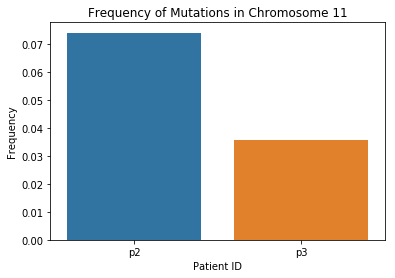

In [68]:
import seaborn as sns
ax = sns.barplot(x=clean_df.index,y="chr11", data=clean_df)
ax.set(xlabel='Patient ID', ylabel='Frequency', title='Frequency of Mutations in Chromosome 11')